In [4]:
import math
def pass1(C0,k,Z,p):
    r = 0
    C = np.empty((1,p),dtype=object)
    for xi in range(0,int((1-Z)*p)):
        x = double(xi)/p
        r = r + C0[0,xi]
        C[0, xi] = C0[0,xi]*(1-(1-k)*exp(-k*x/Z))
        r = r - C[0, xi]
    for xi in range(int((1-Z)*p-1),p-1):
        x = double(xi)/p
        r = r + C0[0,xi]
        C[0,xi] = C0[0,xi]*(1-(1-k)*exp(-k*(1-Z)/Z))*math.pow((1-(x-(1-Z))/Z),(k-1))
        r = r - C[0, xi]
    C[0, p-1] = r
    return C

In [5]:
def passn(C1,k,Z,p):
    Cn = np.empty((1,p),dtype=object)
    
    #Region 1 (X=0)
    sum = 0
    for xi in range(0,int(Z*p)):
        sum = sum + C1[0,xi]
    for xi in range(0,int(Z*p)):
        Cn[0, xi] = k/Z/p*sum
        
    #Region 2 (0<X<=1-Z)
    for xi in range(1,int((1-Z)*p)):
        Cn[0,xi] = Cn[0, xi-1] + k/Z/p * (C1[0,xi+int(Z*p-1)] - Cn[0, xi-1])
        
    #Region 3 (1-Z<X<1)
    sum = 0
    for xi in range(0,int((1-Z)*p)):
        sum = sum + C1[0,xi]
    Cl = 1/Z - 1/Z/p * sum
    for xi in range(int((1-Z)*p)-1,p):
        x = double(xi)/p
        Cn[0, xi] = Cl*(1-(1-k)*exp(-k*(1-Z)/Z))*math.pow((1-(x-(1-Z))/Z),(k-1))
        
    #Region 4 (X=1)
    #r = 0;
    #for xi in range(0,p-1):
    #    r = r + Cn[0,xi]
    
    #Cn(p-1) = p - r
    return Cn

In [6]:
import numpy as np
def zrK(C0,n,Z,ks,p,N):
    #n  passes
    #k  equilibrium
    #z  zone width
    #l  ingot length
    #C0 initial solute concentration
    #p  number of points/partitions
    #Z  normalized zone width
    #N  show the Nth pass on plot
    #X  normalized position
    #Cs solute concentration in refrozen solid

    Cs = np.empty((1,n+1), dtype=object)
    Ct = np.empty((1, n+1), dtype=object)

    for i in range(0,n+1):
        Ct[0,i] = np.zeros((1,p),dtype=object)
    for k in ks:
        Cs[0,0] = np.ones((1,p),dtype = float)
        Cs[0,1] = pass1(Cs[0,0],k,Z,p)

        for i in range(2,n+1):
            Cs[0,i] = passn(Cs[0,i-1],k,Z,p)

        for i in range(0,n+1):
            if k>0:
                Ct[0,i] = Ct[0,i] + Cs[0,i]/len(ks)
            else:
                Ct[0,i] = Ct[0,i] - Cs[0,i]/len(ks)
          
    return Ct

In [11]:
from pylab import *
import matplotlib.pyplot as plot 
import numpy as np
def plotPasses(C0,Cs,N):

    X = np.array(linspace(0,1,p))
    txt = 'Passes = 0'
    plot.semilogy(X,np.transpose(C0*Cs[0,0]),label = txt)
    
    for i in range(1,len(N)):
        txt = 'Passes = ' + str(N[i-1])
        plot.semilogy(X,np.transpose(C0*Cs[0,N[i-1]]),label = txt)
    
    

    plot.xlim([0,1])
    #plot.ylim([0,C0])
    plot.xlabel('Normalized Position Along Ingot')
    plot.ylabel('Impurity Concentration')
    plt.legend()
    plot.show()

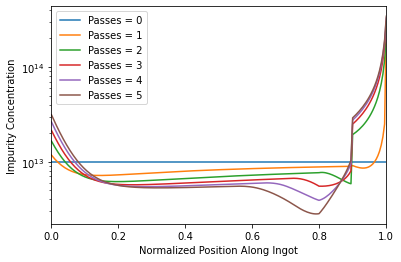

In [15]:
C0 = 1.0e+13
n = 8
Z = 0.1
ks = [0.1,0.3,1.8,2.5]
p = 200
N = [1,2,3,4,5,6]
Ct = zrK(C0,n,Z,ks,p,N)
plotPasses(C0,Ct,N)

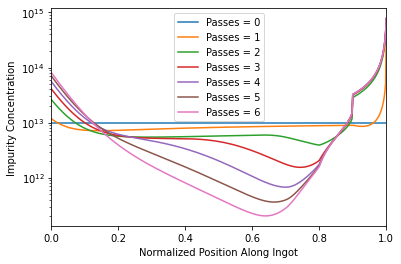

In [14]:
C0 = 1.0e+13
n = 20
Z = 0.1
ks = [0.1,0.3,1.8,2.5]
p = 500
N = [1,4,7,10,13,16,19]
Ct = zrK(C0,n,Z,ks,p,N)
plotPasses(C0,Ct,N)